### College of Computing and Informatics, Drexel University
### INFO 212: Data Science Programming I, Spring 2018
---

## Final Project Report

## Project Title: Philadelphia Crime Trends

## Student(s): Lisa Wen

#### Date: June 3rd, 2018
---

#### Abstract
---

Philadelphia is seeing a decrease in crime over the past decade, but more violent crimes are on the rise, and some districts do not share the general trend of decreased crime rates. This project analyzes crime data to understand what kind of crime is being committed and is on the rise, as well as which districts see an increase in crime and thus need more police to proactively decrease crime in that area. The data set is a 618 MB CSV file from Open Data Philly, and after analysis I found that districts 3, 19, and 22 are on the rise for crime frequency, and although violent crimes are decreasing in general, the most violent crimes like Rape and Homicide are increasing.

### 1. Introduction
---

This project analyzes crime trends in Philadelphia, specifically focusing on the frequency of crime over time in specific neighborhoods and the type of crime being committed. The objective is to identify which districts are most in need of help from the city to battle crime. Generally, [crime has decreased in Philadelphia](http://www.philly.com/philly/news/20170112_Police__Philly_crime_at_lowest_level_in_decades.html), but some districts do not follow this general trend and experience an increase in crime, as well as an increase in violent crime.

To analyze this problem, Philadelphia crime data was sourced from [Open Data Philly](https://www.opendataphilly.org/dataset/crime-incidents), a 618 MB CSV filled with information on the crime type, location, and time. The data itself has normalized the crime time and location, however there is missing data throughout the file. The dataset must be cleaned, wrangled, and aggregated.

It will be cleaned by:
* Dropping rows with less than 11 columns of information
* Dropping rows with nulls for the text_general_code column
* Filling in floats with the unrounded average for the column
* Filling in objects by forward filling

It will be wrangled by:
* Extracting the year from the date
* Labelling the crimes as violent or nonviolent in a new column

It will be aggregated for analysis by:
* Averages of crime frequency, divided by crime type, per year
* Averages of crime frequency, divided by district, per year
* Averages of crime frequency, divided by violence of crime, per year
* Aggregated average of per-year trend

### 2. Problem Definition
---

According to [The Inquirer](http://www.philly.com/philly/news/crime/philly-crime-decrease-homicides-over-300-ross-police-20171229.html), Philadelphia has experienced a decrease in crime over the years. However, certain types of crimes, like homicide, has reached record highs. Certain neighborhoods have also seen an increase in crime as well, while others enjoy a decrease. The objective of this project is to analyze the increase and decrease of types of crime per district and compare it against the general trend in Philadelphia as a whole. This problem arises from past statistical analysis of Philadelphia crime trends, where the city experiences general increases or decreases of crime, and yet specific neighborhoods progressively get worse over the years against the general trend.

The problem itself does not have direct stakeholder, however this problem can help the city government and police officers. The city can plan development projects to focus on neighborhoods that are riddled with the most violent and frequent crime occurences using this data. The police department can also use this data to plan patrol routes to proactively stop crime rather than waste their time patrolling neighborhoods that are relatively safe and do not benefit as much from police patrol.

### 3. Data Sources
---

The data is downloaded from [Open Data Philly](https://www.opendataphilly.org/dataset/crime-incidents). It is a 618 MB CSV file, accessible by using the pandas library to import the data. Open Data Philly collected this data from police department incidents. When someone reports an incident, it is logged into a system. Using this past form of recordkeeping, Open Data Philly is able to extract crime incident datasets for public use and analysis.

### 4. Acquiring and Loading Data
---

In [18]:
# import the necessary library to load the data
import pandas as pd

# load the data in and show a sample
crime_data = pd.read_csv("incidents_part1_part2.csv")
crime_data.head()

,the_geom,lng,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,the_geom_webmercator,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,hour_
0,0101000020E6100000F8EEE23F15CB52C0EE0F10A3D2F6...,-75.173172,340,1,1,2015-12-17 07:26:00,2015-12-17,07:26:00,0101000020110F0000C5A766CE1BEC5FC141FEBD3CBA85...,201501056051,1800 BLOCK S CHADWICK ST,1400.0,Vandalism/Criminal Mischief,-75.173172,39.928303,39.928303,7
1,0101000020E61000007A4F69ED0BCB52C06E9C1C5786F6...,-75.172603,341,1,1,2015-12-17 11:04:00,2015-12-17,11:04:00,0101000020110F0000F89FBBF80BEC5FC1C77C11BD6585...,201501056080,1500 BLOCK MC KEAN ST,1400.0,Vandalism/Criminal Mischief,-75.172603,39.925975,39.925975,11
2,0101000020E6100000D3C89D8834CB52C0D5E3A5381AF6...,-75.175081,342,1,1,2015-12-18 22:55:00,2015-12-18,22:55:00,0101000020110F0000A9DC08F250EC5FC160256000EE84...,201501056360,2200 BLOCK S 17TH ST,1400.0,Vandalism/Criminal Mischief,-75.175081,39.922675,39.922675,22
3,0101000020E6100000E51F85042FCB52C058F92B853CF6...,-75.174745,343,1,1,2015-12-19 00:54:00,2015-12-19,00:54:00,0101000020110F00008468729347EC5FC1E25B43FC1385...,201501056375,2200 BLOCK S 17TH ST,1400.0,Vandalism/Criminal Mischief,-75.174745,39.923722,39.923722,0
4,0101000020E61000007CD13F3D0DCB52C04961410E88F6...,-75.172683,344,1,1,2015-12-20 01:07:00,2015-12-20,01:07:00,0101000020110F00005BFA2F330EEC5FC18DA369A36785...,201501056502,S 16TH ST / MC KEAN ST,1400.0,Vandalism/Criminal Mischief,-75.172683,39.926027,39.926027,1


In [19]:
# show the list of columns in the file with the data types
# we want to know data types so we can fill in missing data easier later

print("The data has the following columns and data types: ")
crime_data.dtypes

The data has the following columns and data types: 


the_geom                 object
lng                     float64
objectid                  int64
dc_dist                   int64
psa                      object
dispatch_date_time       object
dispatch_date            object
dispatch_time            object
the_geom_webmercator     object
dc_key                    int64
location_block           object
ucr_general             float64
text_general_code        object
point_x                 float64
point_y                 float64
lat                     float64
hour_                     int64
dtype: object

### 5. Exploring and Visualizing Data
---

In [20]:
# import necessary libraries to analyze the data
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

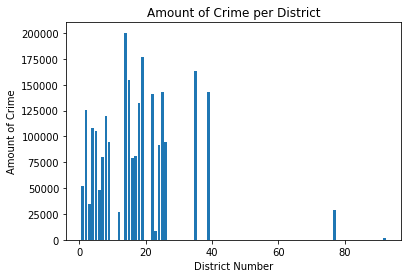

In [21]:
# getting the unique districts and frequency of crime per district
# this gives us an idea of how much crime has happened over the past decade
x = crime_data['dc_dist'].unique()
y = crime_data.groupby('dc_dist')['dc_dist'].count()

plt.bar(x, y)
plt.xlabel('District Number')
plt.ylabel('Amount of Crime')
plt.title("Amount of Crime per District")
plt.show()

In [22]:
# function to plot data
def plotFile(x2006, y2006, x2017, y2017, title, x_label, x_ticks, y_ticks, rotate):
    fig = plt.figure(figsize = (20, 5))
    axes1 = fig.add_subplot(131)
    axes2 = fig.add_subplot(132)

    axes1.bar(x2006, y2006)
    axes1.set_ylabel('Amount of Crime in 2006')
    axes1.set_xlabel(x_label)
    axes1.set_xticks(x_ticks)
    axes1.set_yticks(y_ticks)
    axes1.set_title(title)
    axes2.bar(x2017, y2017)
    axes2.set_ylabel('Amount of Crime in 2017')
    axes2.set_xlabel(x_label)
    axes2.set_xticks(x_ticks)
    axes2.set_yticks(y_ticks)
    
    if rotate:
        # rotate the ticks so it's vertical and easier to read
        [tick.set_rotation(90) for tick in axes1.get_xticklabels()]
        [tick.set_rotation(90) for tick in axes2.get_xticklabels()]

    #handles distance between figures automatically
    plt.tight_layout()


In [23]:
# exploring the crime frequency between 2006 and 2017 by district
print(crime_data[crime_data['dispatch_date'].str.contains('2006')].groupby('dc_dist')['dc_dist'].count())
print(crime_data[crime_data['dispatch_date'].str.contains('2017')].groupby('dc_dist')['dc_dist'].count())

dc_dist
1      5698
2     11086
3      6645
4      7928
5      3782
6     10278
7      4613
8      8056
9      8268
12    13837
14    12643
15    17383
16     7290
17     8991
18    10740
19    11749
22     9598
23     7510
24    15790
25    18448
26     9302
35    14171
39     9601
77      752
92      596
Name: dc_dist, dtype: int64
dc_dist
1      2836
2      8068
3      7461
5      2345
6      7201
7      2929
8      4616
9      6575
12     8820
14     9406
15    13170
16     6190
17     4363
18     8417
19    13669
22    11676
24    13016
25    10655
26     6408
35     9714
39     9140
77      646
Name: dc_dist, dtype: int64


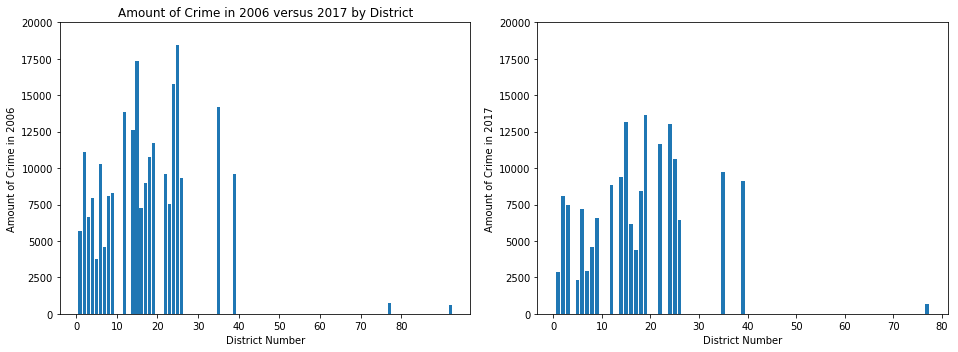

In [24]:
# getting the unique districts and frequency of crime per district for 2006 and 2017
x2006 = sorted(crime_data[crime_data['dispatch_date'].str.contains('2006')]['dc_dist'].unique())
y2006 = crime_data[crime_data['dispatch_date'].str.contains('2006')].groupby('dc_dist')['dc_dist'].count()

x2017 = sorted(crime_data[crime_data['dispatch_date'].str.contains('2017')]['dc_dist'].unique())
y2017 = crime_data[crime_data['dispatch_date'].str.contains('2017')].groupby('dc_dist')['dc_dist'].count()

title = 'Amount of Crime in 2006 versus 2017 by District'
x_label = 'District Number'
x_ticks = np.arange(0, 90, 10)
y_ticks = np.arange(0, 21000, 2500)


# plot the districts and crime frequency next to each other for comparison
# this will help us understand the changes that occurred over time
plotFile(x2006, y2006, x2017, y2017, title, x_label, x_ticks, y_ticks, False)


In [25]:
# exploring the crime frequency between 2006 and 2017 by crime type
print(crime_data[crime_data['dispatch_date'].str.contains('2006')].groupby('text_general_code')['text_general_code'].count())
print(crime_data[crime_data['dispatch_date'].str.contains('2017')].groupby('text_general_code')['text_general_code'].count())

text_general_code
Aggravated Assault Firearm                  3350
Aggravated Assault No Firearm               7057
All Other Offenses                         49905
Arson                                        622
Burglary Non-Residential                    2680
Burglary Residential                        8548
DRIVING UNDER THE INFLUENCE                 4704
Disorderly Conduct                          4423
Embezzlement                                 548
Forgery and Counterfeiting                   672
Fraud                                       9340
Gambling Violations                          180
Homicide - Criminal                          322
Homicide - Criminal                           50
Homicide - Justifiable                        20
Liquor Law Violations                        537
Motor Vehicle Theft                         8819
Narcotic / Drug Law Violations             13700
Offenses Against Family and Children         191
Other Assaults                             26871
Ot

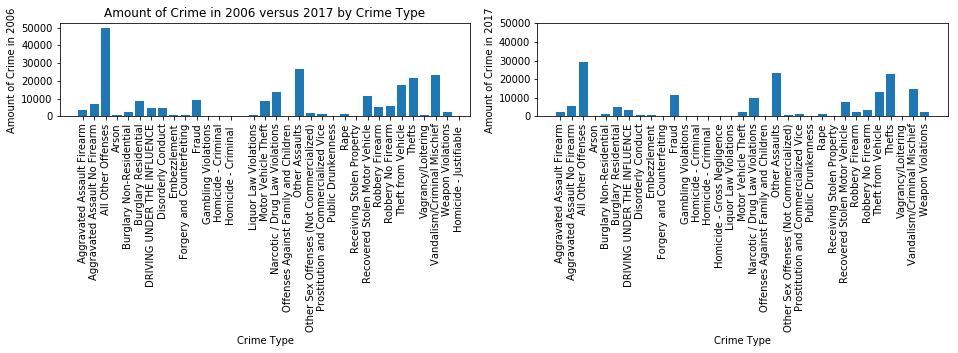

In [26]:
# getting the unique types of crime and frequency of that type for 2006 and 2017
x2006 = sorted(crime_data[crime_data['dispatch_date'].str.contains('2006')]['text_general_code'].unique())
y2006 = crime_data[crime_data['dispatch_date'].str.contains('2006')].groupby('text_general_code')['text_general_code'].count()

# get the crime types, but not the null crime type
x2017 = crime_data[pd.notnull(crime_data['text_general_code'])]
x2017 = sorted(x2017[x2017['dispatch_date'].str.contains('2017')]['text_general_code'].unique())
y2017 = crime_data[crime_data['dispatch_date'].str.contains('2017')].groupby('text_general_code')['text_general_code'].count()

title = 'Amount of Crime in 2006 versus 2017 by Crime Type'
x_label = 'Crime Type'
x_ticks = x2017
y_ticks = np.arange(0, 50001, 10000)


# plot the districts and crime frequency next to each other for comparison
# this will help us understand the changes that occurred over time
plotFile(x2006, y2006, x2017, y2017, title, x_label, x_ticks, y_ticks, True)


#### Comparing 2006 and 2017 Crime Data

As the two bar charts above show, there is a general decrease in crime in the past 10 years. This confirms the news article about the decrease in crime in general. However, looking closely at the "Amount of Crime in 2006 versus 2017 by District" chart, we see that some districts are actually doing worse than before. For example, district 19 had 11,749 instances of crime in 2006, but it increased to 13,669 in 2017. A similar pattern occurs in the "Amount of Crime in 2006 versus 2017 by Crime Type" chart. There is a trend of decreasing crime, with some increases such as fraud increasing from 9,340 in 2006 to 11,664 in 2017.

### 6. Wrangling and Cleansing Data
---

#### Clean the Data by Dropping Nulls
Below, I cleaned the data by dropping null values. It seems like the threshold of rows with 5 or more missing values being dropped all correlated with the same few columns (the_geom, lng, the_geom_webmercator, point_x, point_y, lat), which happens to be derived from the location of the incident. I also dropped all rows with nulls as the text_general_code since without it, I am unable to determine the type of crime that occured.

In [27]:
# show how many nulls there are in the dataset per column

[print(column + " is missing " + str(crime_data[column].isnull().sum()) + " values.") for column in crime_data]

the_geom is missing 18977 values.
lng is missing 18977 values.
objectid is missing 0 values.
dc_dist is missing 0 values.
psa is missing 0 values.
dispatch_date_time is missing 0 values.
dispatch_date is missing 0 values.
dispatch_time is missing 0 values.
the_geom_webmercator is missing 18977 values.
dc_key is missing 0 values.
location_block is missing 0 values.
ucr_general is missing 1685 values.
text_general_code is missing 1685 values.
point_x is missing 18977 values.
point_y is missing 18977 values.
lat is missing 18977 values.
hour_ is missing 0 values.


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [28]:
# dropping all rows with more than 5 missing column values
crime_data_no_na = crime_data.dropna(thresh = 11)

# dropping all rows with nulls for text_general_code
# this is because this project's analysis heavily relies on this field
crime_data_no_na = crime_data_no_na[pd.notnull(crime_data_no_na['text_general_code'])]

In [29]:
# check the list of missing values again
[print(column + " is missing " + str(crime_data_no_na[column].isnull().sum()) + " values.") for column in crime_data_no_na]

the_geom is missing 18950 values.
lng is missing 18950 values.
objectid is missing 0 values.
dc_dist is missing 0 values.
psa is missing 0 values.
dispatch_date_time is missing 0 values.
dispatch_date is missing 0 values.
dispatch_time is missing 0 values.
the_geom_webmercator is missing 18950 values.
dc_key is missing 0 values.
location_block is missing 0 values.
ucr_general is missing 0 values.
text_general_code is missing 0 values.
point_x is missing 18950 values.
point_y is missing 18950 values.
lat is missing 18950 values.
hour_ is missing 0 values.


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### Clean the Data by Filling In Values
I filled in the data by filling in integer values with a rounded averages and floats with unrounded averages.

In [30]:
# get the mean and fill it in, no rounding necessary since they're floats
crime_data_column_clean = crime_data_no_na
crime_data_column_clean['lng'] = crime_data_column_clean['lng'].fillna(crime_data_column_clean['lng'].mean())
crime_data_column_clean['point_x'] = crime_data_column_clean['point_x'].fillna(crime_data_column_clean['point_x'].mean())
crime_data_column_clean['point_y'] = crime_data_column_clean['point_y'].fillna(crime_data_column_clean['point_y'].mean())
crime_data_column_clean['lat'] = crime_data_column_clean['lat'].fillna(crime_data_column_clean['lat'].mean())

In [31]:
# forward fill the object columns
crime_data_column_clean['the_geom'] = crime_data_column_clean['the_geom'].fillna(method='ffill')
crime_data_column_clean['the_geom_webmercator'] = crime_data_column_clean['the_geom_webmercator'].fillna(method='ffill')

In [32]:
# check the list of missing values again
[print(column + " is missing " + str(crime_data_column_clean[column].isnull().sum()) + " values.") for column in crime_data_column_clean]

the_geom is missing 0 values.
lng is missing 0 values.
objectid is missing 0 values.
dc_dist is missing 0 values.
psa is missing 0 values.
dispatch_date_time is missing 0 values.
dispatch_date is missing 0 values.
dispatch_time is missing 0 values.
the_geom_webmercator is missing 0 values.
dc_key is missing 0 values.
location_block is missing 0 values.
ucr_general is missing 0 values.
text_general_code is missing 0 values.
point_x is missing 0 values.
point_y is missing 0 values.
lat is missing 0 values.
hour_ is missing 0 values.


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### Cleaning the Data by Trimming Columns of Spaces
I am trimming the text_general_code column due to the grouping issue of duplicating the value 'Homicide - Criminal'. It appears as 'Homicide - Criminal' and 'Homicide - Criminal '.

In [33]:
# unique values before the trim
crime_data_column_clean['text_general_code'].unique()

array(['Vandalism/Criminal Mischief', 'Robbery Firearm', 'Thefts',
       'Other Assaults', 'Vagrancy/Loitering', 'Theft from Vehicle',
       'Aggravated Assault No Firearm', 'Burglary Non-Residential',
       'Forgery and Counterfeiting', 'Disorderly Conduct',
       'Burglary Residential', 'Rape', 'Fraud', 'All Other Offenses',
       'Aggravated Assault Firearm', 'Robbery No Firearm',
       'Narcotic / Drug Law Violations', 'Arson',
       'Other Sex Offenses (Not Commercialized)',
       'DRIVING UNDER THE INFLUENCE', 'Liquor Law Violations',
       'Weapon Violations', 'Embezzlement', 'Public Drunkenness',
       'Prostitution and Commercialized Vice',
       'Receiving Stolen Property',
       'Offenses Against Family and Children', 'Gambling Violations',
       'Motor Vehicle Theft', 'Recovered Stolen Motor Vehicle',
       'Homicide - Criminal', 'Homicide - Criminal ',
       'Homicide - Justifiable ', 'Homicide - Gross Negligence'],
      dtype=object)

In [34]:
crime_data_column_clean['text_general_code'] = crime_data_column_clean['text_general_code'].apply(lambda x: x.strip())

In [35]:
# unique values after the trim
crime_data_column_clean['text_general_code'].unique()

array(['Vandalism/Criminal Mischief', 'Robbery Firearm', 'Thefts',
       'Other Assaults', 'Vagrancy/Loitering', 'Theft from Vehicle',
       'Aggravated Assault No Firearm', 'Burglary Non-Residential',
       'Forgery and Counterfeiting', 'Disorderly Conduct',
       'Burglary Residential', 'Rape', 'Fraud', 'All Other Offenses',
       'Aggravated Assault Firearm', 'Robbery No Firearm',
       'Narcotic / Drug Law Violations', 'Arson',
       'Other Sex Offenses (Not Commercialized)',
       'DRIVING UNDER THE INFLUENCE', 'Liquor Law Violations',
       'Weapon Violations', 'Embezzlement', 'Public Drunkenness',
       'Prostitution and Commercialized Vice',
       'Receiving Stolen Property',
       'Offenses Against Family and Children', 'Gambling Violations',
       'Motor Vehicle Theft', 'Recovered Stolen Motor Vehicle',
       'Homicide - Criminal', 'Homicide - Justifiable',
       'Homicide - Gross Negligence'], dtype=object)

#### Wrangle the Data
The data is wrangled by extracting the year from the dispatch_date_time field. This is to make it easier to pull data year-by-year and create statistics out of it on a yearly basis. It is also wrangled by labelling the crimes as violent or nonviolent in a new column as a 0 or 1 to indicate and easily calculate the trend of violent crime over the past decade.

In [36]:
# extract the year from the dispatch_date_time field into its own column
get_year = lambda x: x[0 : 4]

crime_data_wrangle = crime_data_column_clean
crime_data_wrangle['year'] = crime_data_wrangle['dispatch_date_time'].apply(get_year)

In [37]:
# show the new column changes
crime_data_wrangle.head()

,the_geom,lng,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,the_geom_webmercator,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,hour_,year
0,0101000020E6100000F8EEE23F15CB52C0EE0F10A3D2F6...,-75.173172,340,1,1,2015-12-17 07:26:00,2015-12-17,07:26:00,0101000020110F0000C5A766CE1BEC5FC141FEBD3CBA85...,201501056051,1800 BLOCK S CHADWICK ST,1400.0,Vandalism/Criminal Mischief,-75.173172,39.928303,39.928303,7,2015
1,0101000020E61000007A4F69ED0BCB52C06E9C1C5786F6...,-75.172603,341,1,1,2015-12-17 11:04:00,2015-12-17,11:04:00,0101000020110F0000F89FBBF80BEC5FC1C77C11BD6585...,201501056080,1500 BLOCK MC KEAN ST,1400.0,Vandalism/Criminal Mischief,-75.172603,39.925975,39.925975,11,2015
2,0101000020E6100000D3C89D8834CB52C0D5E3A5381AF6...,-75.175081,342,1,1,2015-12-18 22:55:00,2015-12-18,22:55:00,0101000020110F0000A9DC08F250EC5FC160256000EE84...,201501056360,2200 BLOCK S 17TH ST,1400.0,Vandalism/Criminal Mischief,-75.175081,39.922675,39.922675,22,2015
3,0101000020E6100000E51F85042FCB52C058F92B853CF6...,-75.174745,343,1,1,2015-12-19 00:54:00,2015-12-19,00:54:00,0101000020110F00008468729347EC5FC1E25B43FC1385...,201501056375,2200 BLOCK S 17TH ST,1400.0,Vandalism/Criminal Mischief,-75.174745,39.923722,39.923722,0,2015
4,0101000020E61000007CD13F3D0DCB52C04961410E88F6...,-75.172683,344,1,1,2015-12-20 01:07:00,2015-12-20,01:07:00,0101000020110F00005BFA2F330EEC5FC18DA369A36785...,201501056502,S 16TH ST / MC KEAN ST,1400.0,Vandalism/Criminal Mischief,-75.172683,39.926027,39.926027,1,2015


In [38]:
# label the text_general_code as either violent (1) or nonvioment crime (0) into a new column
violent_list = ['Robbery Firearm', 'Other Assaults', 'Aggravated Assault No Firearm', 'Rape',
                'Aggravated Assault Firearm', 'Other Sex Offenses (Not Commercialized)',
                'Homicide - Criminal', 'Homicide - Justifiable ',
                'Homicide - Gross Negligence']
get_crime_type = lambda x: 1 if x in violent_list else 0


crime_data_wrangle['violent'] = crime_data_wrangle['text_general_code'].apply(get_crime_type)

In [39]:
# show the new column changes
crime_data_wrangle.head()

,the_geom,lng,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,the_geom_webmercator,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,hour_,year,violent
0,0101000020E6100000F8EEE23F15CB52C0EE0F10A3D2F6...,-75.173172,340,1,1,2015-12-17 07:26:00,2015-12-17,07:26:00,0101000020110F0000C5A766CE1BEC5FC141FEBD3CBA85...,201501056051,1800 BLOCK S CHADWICK ST,1400.0,Vandalism/Criminal Mischief,-75.173172,39.928303,39.928303,7,2015,0
1,0101000020E61000007A4F69ED0BCB52C06E9C1C5786F6...,-75.172603,341,1,1,2015-12-17 11:04:00,2015-12-17,11:04:00,0101000020110F0000F89FBBF80BEC5FC1C77C11BD6585...,201501056080,1500 BLOCK MC KEAN ST,1400.0,Vandalism/Criminal Mischief,-75.172603,39.925975,39.925975,11,2015,0
2,0101000020E6100000D3C89D8834CB52C0D5E3A5381AF6...,-75.175081,342,1,1,2015-12-18 22:55:00,2015-12-18,22:55:00,0101000020110F0000A9DC08F250EC5FC160256000EE84...,201501056360,2200 BLOCK S 17TH ST,1400.0,Vandalism/Criminal Mischief,-75.175081,39.922675,39.922675,22,2015,0
3,0101000020E6100000E51F85042FCB52C058F92B853CF6...,-75.174745,343,1,1,2015-12-19 00:54:00,2015-12-19,00:54:00,0101000020110F00008468729347EC5FC1E25B43FC1385...,201501056375,2200 BLOCK S 17TH ST,1400.0,Vandalism/Criminal Mischief,-75.174745,39.923722,39.923722,0,2015,0
4,0101000020E61000007CD13F3D0DCB52C04961410E88F6...,-75.172683,344,1,1,2015-12-20 01:07:00,2015-12-20,01:07:00,0101000020110F00005BFA2F330EEC5FC18DA369A36785...,201501056502,S 16TH ST / MC KEAN ST,1400.0,Vandalism/Criminal Mischief,-75.172683,39.926027,39.926027,1,2015,0


### 7. Analyzing Data
---

To analyze the data, I will aggregate the yearly trend and compare it over a decade. I will also compare the change over the past decade per crime type and district by plotting it as a line plot. Lastly, I derive statistics to further understand the plots.

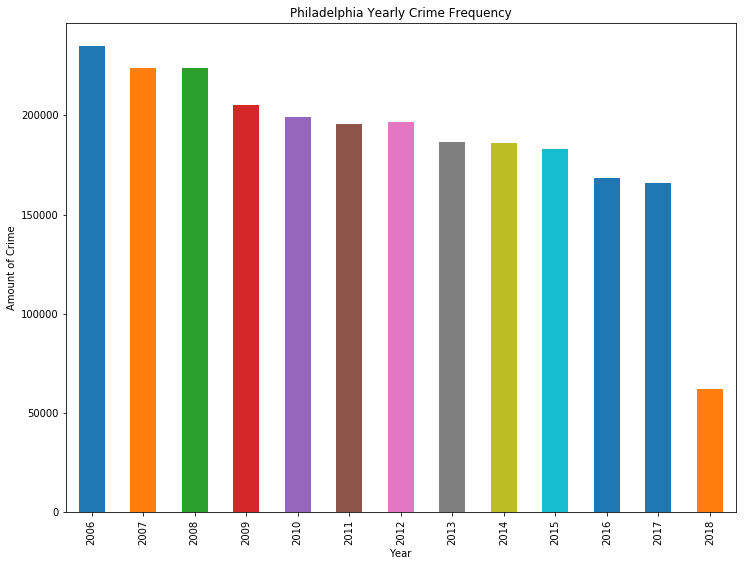

In [163]:
def yearly_breakdown():
    # get yearly breakdown of crime frequency
    years = sorted(crime_data_wrangle['year'].unique())
    year_by_year = crime_data_wrangle.groupby('year')['text_general_code'].count()

    # turn results into a series
    year_plot = pd.Series(year_by_year, index = years)

    # plot the series
    year_plot.plot.bar(figsize=(12, 9))
    plt.title('Philadelphia Yearly Crime Frequency')
    plt.xlabel('Year')
    plt.ylabel('Amount of Crime')
    plt.show()

yearly_breakdown()

In [93]:
# get all the years to use as xticks; drop 2018
years = sorted(crime_data_wrangle['year'].unique())
years = years[:-1]

In [100]:
# get yearly breakdown of crime frequency per agg type
def create_df(agg_type):
    # create a dataframe
    year_by_year_crime = crime_data_wrangle.groupby([agg_type, 'year']).size().reset_index(name='freq')
    crime_by_year_df = pd.DataFrame(year_by_year_crime)
    crime_by_year_df = crime_by_year_df.pivot(index = 'year', columns = agg_type, values = 'freq')

    # dropping 2018 data since the year is not over yet
    crime_by_year_df = crime_by_year_df.drop('2018')
    
    return crime_by_year_df

In [111]:
# get yearly breakdown of crime frequency, by crime type
crime_by_year_type = create_df('text_general_code')

# show a sample of the dataframe
crime_by_year_type.head()

text_general_code,Aggravated Assault Firearm,Aggravated Assault No Firearm,All Other Offenses,Arson,Burglary Non-Residential,Burglary Residential,DRIVING UNDER THE INFLUENCE,Disorderly Conduct,Embezzlement,Forgery and Counterfeiting,...,Rape,Receiving Stolen Property,Recovered Stolen Motor Vehicle,Robbery Firearm,Robbery No Firearm,Theft from Vehicle,Thefts,Vagrancy/Loitering,Vandalism/Criminal Mischief,Weapon Violations
year,,,,,,,,,,,,,,,,,,,,,
2006,3350.0,7057.0,49905.0,622.0,2680.0,8548.0,4704.0,4423.0,548.0,672.0,...,1028.0,140.0,11513.0,5164.0,5579.0,17551.0,21552.0,693.0,23501.0,2195.0
2007,2858.0,6529.0,41838.0,612.0,2606.0,8640.0,5416.0,4142.0,556.0,714.0,...,1041.0,85.0,12562.0,4521.0,5468.0,17665.0,21273.0,549.0,22108.0,1939.0
2008,2684.0,7041.0,41803.0,684.0,2653.0,10223.0,6175.0,4455.0,497.0,614.0,...,1038.0,96.0,12062.0,4201.0,5385.0,17441.0,23119.0,757.0,20824.0,1916.0
2009,2404.0,6399.0,39303.0,479.0,2215.0,8704.0,5683.0,4473.0,430.0,581.0,...,916.0,63.0,9910.0,3887.0,5107.0,15685.0,22143.0,1053.0,18337.0,1619.0
2010,2528.0,6358.0,35751.0,452.0,2042.0,8751.0,5248.0,4348.0,370.0,571.0,...,921.0,59.0,5194.0,3522.0,4816.0,17104.0,22753.0,930.0,17789.0,1666.0


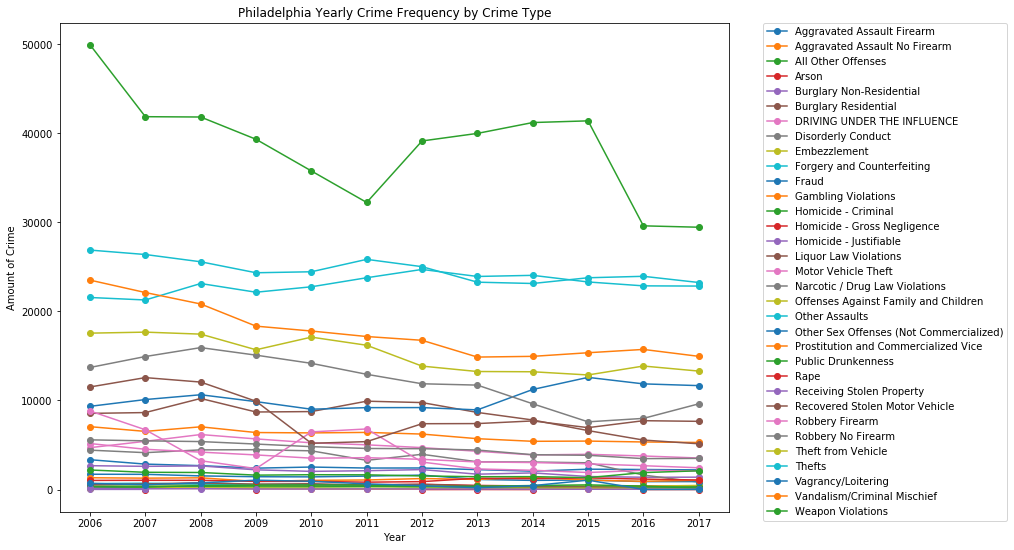

In [112]:
# plot the dataframe
crime_by_year_type.plot(marker = 'o', figsize=(12, 9), label = '{\\footnotesize \$y = x^2\$}')
plt.title('Philadelphia Yearly Crime Frequency by Crime Type')
plt.xticks(np.arange(12), years)
plt.xlabel('Year')
plt.ylabel('Amount of Crime')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [155]:
# get yearly breakdown of crime frequency, by crime type
crime_by_year_dist = create_df('dc_dist')

# show a sample of the dataframe
crime_by_year_dist.head()

dc_dist,1,2,3,4,5,6,7,8,9,12,...,19,22,23,24,25,26,35,39,77,92
year,,,,,,,,,,,,,,,,,,,,,
2006,5698.0,11086.0,6645.0,7928.0,3782.0,10278.0,4613.0,8056.0,8268.0,13837.0,...,11749.0,9598.0,7510.0,15790.0,18448.0,9302.0,14171.0,9601.0,752.0,596.0
2007,4889.0,10584.0,4946.0,6939.0,3590.0,10210.0,4487.0,8008.0,7368.0,13392.0,...,11599.0,8839.0,6960.0,15370.0,18149.0,8110.0,14068.0,9107.0,811.0,502.0
2008,4826.0,10630.0,5061.0,7083.0,3369.0,9516.0,4336.0,7797.0,8419.0,12973.0,...,11701.0,9634.0,6505.0,14778.0,15640.0,7848.0,14165.0,9514.0,761.0,476.0
2009,4449.0,10541.0,4568.0,6360.0,2891.0,8618.0,4230.0,7120.0,7636.0,11729.0,...,11275.0,8781.0,6250.0,14570.0,13263.0,7790.0,12020.0,8195.0,594.0,53.0
2010,4925.0,10465.0,9537.0,887.0,2687.0,8582.0,4133.0,6531.0,7949.0,11865.0,...,11824.0,13760.0,52.0,13864.0,12665.0,7824.0,11541.0,8070.0,561.0,NaN


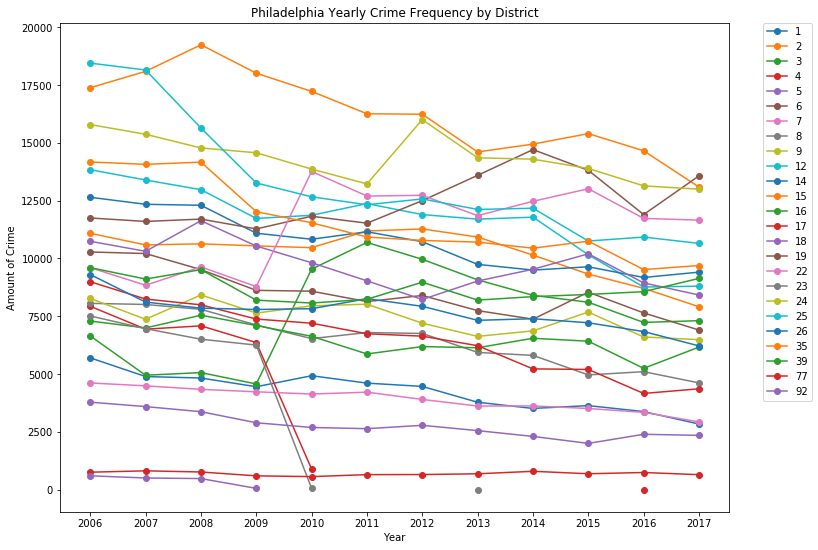

In [156]:
# plot the dataframe
crime_by_year_dist.plot(marker = 'o', figsize=(12, 9), label = '{\\footnotesize \$y = x^2\$}')
plt.title('Philadelphia Yearly Crime Frequency by District')
plt.xticks(np.arange(12), years)
plt.xlabel('Year')
plt.ylabel('Amount of Crime')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [157]:
# get yearly breakdown of crime frequency, by violence
crime_by_year_violent = create_df('violent')
crime_by_year_violent.columns = ['Nonviolent', 'Violent']

# show a sample of the dataframe
crime_by_year_violent.head()

,Nonviolent,Violent
year,,
2006,189193,45562
2007,180494,43408
2008,181344,42391
2009,165369,39675
2010,159922,39493


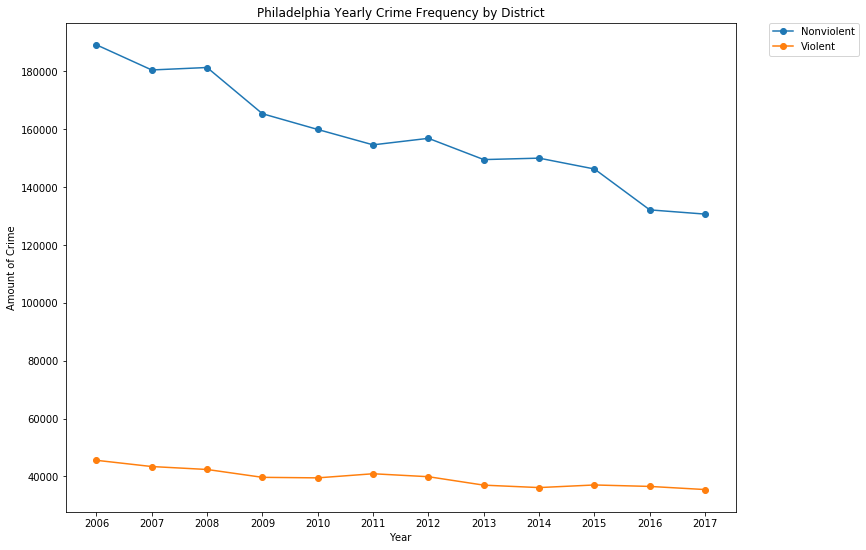

In [158]:
# plot the dataframe
crime_by_year_violent.plot(marker = 'o', figsize=(12, 9), label = '{\\footnotesize \$y = x^2\$}')
plt.title('Philadelphia Yearly Crime Frequency by District')
plt.xticks(np.arange(12), years)
plt.xlabel('Year')
plt.ylabel('Amount of Crime')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [159]:
def get_average_change(df):
    # get the percent change over time of crime frequency per crime type
    crime_by_year_stats = df.pct_change(axis = 0)
    crime_by_year_stats = crime_by_year_stats * 100

    # drop 2006 because we will have no data for it
    crime_by_year_stats = crime_by_year_stats.drop('2006')

    # show a sample of the data
    crime_by_year_stats.head()

    # calculate the average percent change over time per crime type
    [print(str(c) + " has a change of " +  str(crime_by_year_stats[c].mean()) + "%") for c in crime_by_year_stats.columns]

In [160]:
# get the average percent change stats by crime type over the years
get_average_change(crime_by_year_type)

Aggravated Assault Firearm has a change of -3.4807788975184963%
Aggravated Assault No Firearm has a change of -2.4825912224602096%
All Other Offenses has a change of -3.914449610670235%
Arson has a change of -2.248970313648877%
Burglary Non-Residential has a change of -5.191640980007876%
Burglary Residential has a change of -3.921324831787133%
DRIVING UNDER THE INFLUENCE has a change of -2.209646186370283%
Disorderly Conduct has a change of -11.304716669409435%
Embezzlement has a change of -1.015446098068683%
Forgery and Counterfeiting has a change of -9.710127522391073%
Fraud has a change of 2.4610868167325894%
Gambling Violations has a change of -12.003531111775319%
Homicide - Criminal has a change of -1.2008576125931365%
Homicide - Gross Negligence has a change of 135.7142857142857%
Homicide - Justifiable has a change of 10.000000000000009%
Liquor Law Violations has a change of -8.18674119049463%
Motor Vehicle Theft has a change of -0.9792547897696428%
Narcotic / Drug Law Violations

In [161]:
# get the average percent change stats by district over the years
get_average_change(crime_by_year_dist)

1 has a change of -5.836053467069418%
2 has a change of -2.916875725126384%
3 has a change of 4.680820447450791%
4 has a change of -41.309560940976056%
5 has a change of -3.8511394981906566%
6 has a change of -3.2941688906520734%
7 has a change of -3.976583118976522%
8 has a change of -4.755498449113328%
9 has a change of -1.7690592252471553%
12 has a change of -3.8533042186370725%
14 has a change of -2.5674604627306032%
15 has a change of -2.3904211584238%
16 has a change of -1.0563071581098533%
17 has a change of -6.121752097976634%
18 has a change of -1.8369738689790578%
19 has a change of 1.6193856529058734%
22 has a change of 3.059172484186833%
23 has a change of -43.005181893031164%
24 has a change of -1.4920052087264606%
25 has a change of -4.688394194009311%
26 has a change of -3.474173765504938%
35 has a change of -3.242608551853411%
39 has a change of -0.23766205792642336%
77 has a change of -0.6710158778256465%
92 has a change of -36.60554705585007%


In [162]:
# get the average percent change stats by violence type over the years
get_average_change(crime_by_year_violent)

Nonviolent has a change of -3.24685585419397%
Violent has a change of -2.2047393971276934%


### 8. Reporting Results
---

Prior to solving the problem, I first confirmed that Philadelphia is indeed experiencing a decrease in crime by generating a bar chart of the amount of crime per year. The chart is shown below for reference.

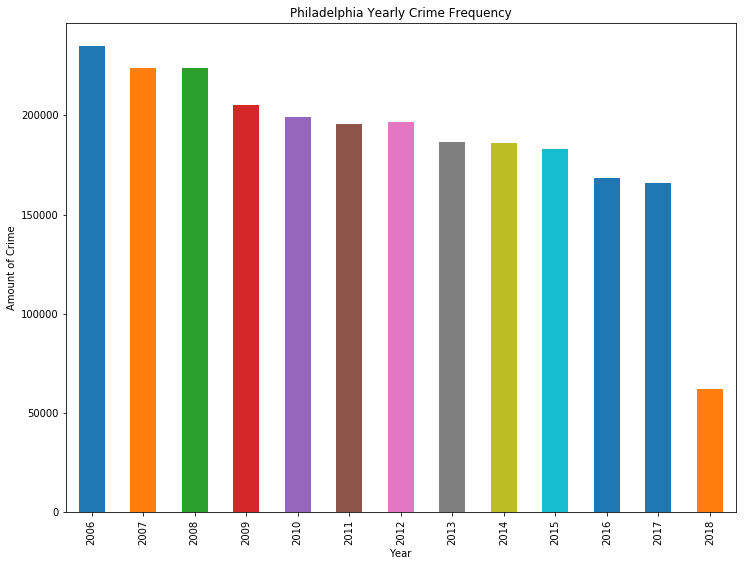

In [165]:
# show the yearly breakdown of all types of crime
yearly_breakdown()

According to the problem definition, 3 major questions were asked to be resolved. Below is the breakdown of the results.

#### What is the general trend of crime frequency, when looking at individual crime types? Are specific types of crime going against the general trend of decreasing crime rates in Philadelphia?
According to the time series line graph and aggregated statistics, most crime types are following the general rule of thumb of decreasing crime rates. However, the following crime types are actually increasing over time:

* Fraud has a change of 2.46%
* Homicide - Gross Negligence has a change of 135.71%
* Homicide - Justifiable has a change of 10%
* Public Drunkenness has a change of 1.12%
* Rape has a change of 1.34%
* Thefts has a change of 0.59%
* Vagrancy/Loitering has a change of 8.53%
* Weapon Violations has a change of 0.58%

#### What is the general trend of crime frequency, when looking at individual district? Are specific districts going against the general trend of decreasing crime rates in Philadelphia?
According to the time series line graph and aggregated statistics, most districts are following the general rule of thumb of decreasing crime rates. However, the following districts are actually increasing over time:

* 3 has a change of 4.680820447450791%
* 19 has a change of 1.6193856529058734%
* 22 has a change of 3.059172484186833%

#### What is the general trend of violent and nonviolent types of crimes?
According to the time series line graph and aggregated statistics, both violent and nonviolent crime is on the decrease. However, specifically homicide is on the increase, which is the worse type of violent crime.

### 9. Conclusion
---

Using the data from Open Data Philly, I was able to clean and wrangle the data to be used for aggregation, plotting, and statistical analysis to solve the problems in my problem definition. After this process, I was able to discover that most of the city of Philadelphia is experiencing a decrease in crime, but 3 districts are experiencing an increase in crime. Furthermore, homicide is on the increase as well. This gives off the notion that patrol routes might want to send more pople aorund districts 3, 19, and 22 while also being more aware of the danger due to increased homicides.

In the future, I'd like to compare the types of crime per district to identify if homicides or other violent crimes are increasing in specific districts. This way, police will be able to truly identify where these homicides are being clustered around. I'd also like to view this information as a time series of types of crime per district over time. This would give a better idea of where to plan development projects and identify which current development projects are working well, if they correlate with districts with a decrease in crime.

During this project, I learned how to turn the data into a format that I can use. It took me a while to pivot the data from the original form into the dataframe used to create most of the plots. I also learned how to dig into the data to understand how it can help solve problems, not just as a way to generate statistics that do not carry much meaning behind it.

### 10. References
---

["As most crime decreases, Philly records highest year-end homicide total since 2012" article from The Inquirer](http://www.philly.com/philly/news/crime/philly-crime-decrease-homicides-over-300-ross-police-20171229.html)

["Police: Philly crime at lowest level in decades" article from The Inquirer](http://www.philly.com/philly/news/20170112_Police__Philly_crime_at_lowest_level_in_decades.html)

[Open Data Philly - Crime Incidents Dataset](https://www.opendataphilly.org/dataset/crime-incidents)